<a href="https://colab.research.google.com/github/ekqlsrla/ESAA-2/blob/main/HW/1205_tensorflow_CH04_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **파이썬 딥러닝 텐서플로 Part 04 : 합성곱 신경망**
---

## **| 01** 합성곱 신경망

1.  합성곱 신경망(CNN : Convolutional Neural Network)

* 데이터가 가진 특징들의 패턴을 학습하는 알고리즘
  * Image Classification / Object Detection / Style Transfer

### 1-1 이미지 표현

* 화소를 나타내는 숫자는 이미지의 강도를 나타내고, 숫자가 클수록 더 강한 특성을 나타낸다고 이해할 수 있음
* 컬러 이미지는 R,G,B 채널로 구성된 3장의 이미지를 겹쳐서 표현, 숫자가 클수록 해당 색상을 더 강하게 표현

### 1-2 합성곱

* 입력 이미지에 대하여 일반적으로 **정방형 크기**를 가지는 커널을 사용하여, 입력 이미지에 대한 **특성 추출** -> `합성곱 연산을 통해서 추출된 이미지 : 특성맵`

### 1-3 채널

: 입력 이미지를 구성하는 2차원 배열의 개수

* **입력 이미지의 채널 개수만큼** 커널이 생성되고, 각 채널마다 하나씩 커널을 적용하여 합성곱 연산 수행
* 합성곱 레이어의 출력 필터 개수 : 20 / 입력 이미지의 채널 개수 : 3
  * (3 X 3 X 입력 채널 수 X 출력 필터 수 ) = 3 x 3 x 3(R,G,B) x 20 = 540 + bias

### 1-4 스트라이드 (stride)

: 커널이 이동하는 간격으로 주로 1 또는 2로 설정

### 1-5 패딩 (padding)

: 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 입력 이미지의 가장 자리에 0으로 채우는 것

```
#zero - padding
padding = 'same' 
```

### 1-6 특성맵 ㅏ이즈

1. 출력 데이터의 크기를 구하는 식

$$ (Output Height, Output Width) = (\frac{Image Height + 2P - Kernel Height}{S} +1, \frac{Image Width + 2P - Kernel Width}{S} + 1)$$ 

* Image Height, Image Width : 입력 크기
* Kernel Height, Kernel Width : 필터 크기
* S : 스트라이드
* P : 패딩
* Output Height, Output Width : 출력 크기

### 1-7 풀링

: 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어

* 이미지 축소를 통해 **연산량 감소 & 과대적합 방지**
* 최대 풀링 / 평균 풀링

---
## **| 02** 간단한 모델 생성

### 2-1 데이터 로드 및 전처리


In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()


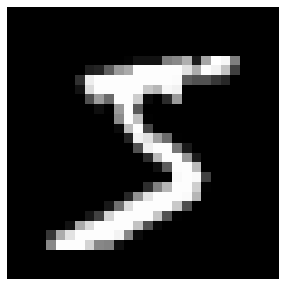

In [3]:
#첫번째 이미지 출력

import matplotlib.pylab as plt

def plot_image(data,idx) :
  plt.figure(figsize = (5,5))
  plt.imshow(data[idx], cmap = 'gray')
  plt.axis('off')
  plt.show()

plot_image(x_train,0)

In [4]:
#정규화

x_train = x_train/255.0
x_valid = x_valid/255.0

In [5]:
#채널 추가
print(x_train.shape, x_valid.shape)

#가장 마지막 축에 채널 추가
x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape,x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### 2-2 Sequential API로 모델 생성 및 학습



In [6]:
model = tf.keras.Sequential([
    #Convolution 적용
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1), name = 'conv'),
    #Max Pooling
    tf.keras.layers.MaxPooling2D((2,2), name = 'pool'),
    #Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

In [7]:
#모델 컴파일
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#모델 훈련
history = model.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2167 - accuracy: 0.9407 - val_loss: 0.0855 - val_accuracy: 0.9758
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0789 - accuracy: 0.9770 - val_loss: 0.0676 - val_accuracy: 0.9782
Epoch 3/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0585 - accuracy: 0.9827 - val_loss: 0.0658 - val_accuracy: 0.9788
Epoch 4/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0487 - accuracy: 0.9854 - val_loss: 0.0555 - val_accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0405 - accuracy: 0.9882 - val_loss: 0.0526 - val_accuracy: 0.9824
Epoch 6/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0348 - accuracy: 0.9893 - val_loss: 0.0550 - val_accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0299 - accuracy: 0.9911 - val_loss: 0.0552 -

In [8]:
model.evaluate(x_valid_in,y_valid)

313/313 [==============================] - 4s 13ms/step - loss: 0.0602 - accuracy: 0.9839


[0.060227006673812866, 0.9839000105857849]

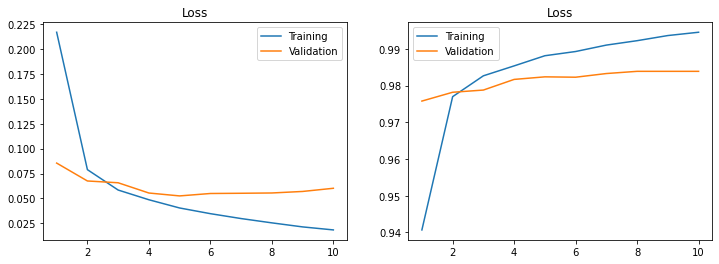

In [9]:
from matplotlib.pyplot import axvline
def plot_loss_acc(history,epoch) :
  loss,val_loss = history.history['loss'], history.history['val_loss']
  acc,val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig,axes = plt.subplots(1,2,figsize = (12,4))

  axes[0].plot(range(1,epoch + 1), loss, label = 'Training')
  axes[0].plot(range(1,epoch + 1), val_loss, label = 'Validation')
  axes[0].legend(loc = 'best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1,epoch + 1), acc, label = 'Training')
  axes[1].plot(range(1,epoch + 1), val_acc, label = 'Validation')
  axes[1].legend(loc = 'best')
  axes[1].set_title('Loss')

  plt.show()

plot_loss_acc(history,10)

### 2-3 모델 구조 파악

* `summary` 메소드를 적용해주면, 모델의 구조를 요약해서 보여줌

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [11]:
#입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [12]:
#출력 텐서 형태
model.output


<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [13]:
model.layers

In [14]:
#첫번쨰 레이어 선택
model.layers[0]

In [15]:
#첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [16]:
#첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

* 커널 가중치의 shape (3,3,1,32)
 * (3,3) : 필터의 크기
 * 1 : 입력층의 채널 개수
 * 32 : 출력층의 채널 개수
 * 가능한 파라미터 수 : 3 x 3 x 1 x 32 = 288

In [17]:
#첫번쨰 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 2.25577965e-01,  2.77868390e-01,  3.31267118e-01,
           -8.64460766e-02, -7.00513870e-02,  1.66193083e-01,
           -4.53049578e-02,  4.23590630e-01,  2.62636621e-03,
            1.77570030e-01,  5.06641753e-02, -4.97360498e-01,
            2.92978197e-01,  1.74881890e-01, -2.34127656e-01,
           -3.97891074e-01,  2.55832583e-01, -3.21891695e-01,
           -1.25900233e+00,  2.61494756e-01,  2.50577718e-01,
           -1.21790648e+00, -3.69061530e-02,  1.22200780e-01,
            3.01678516e-02, -4.61322129e-01,  2.46665061e-01,
           -6.62412643e-01, -1.62373766e-01, -3.43920588e-01,
            9.11097467e-01, -1.35404021e-02]],
 
         [[ 6.80281281e-01, -9.48025100e-03,  4.27662224e-01,
           -5.33343405e-02, -6.51720464e-02, -2.35292956e-01,
            3.44965041e-01,  5.91604710e-01,  4.43159901e-02,
           -1.16689339e-01,  3.93657595e-01, -1.60439610e-01,
           

In [18]:
#첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 2.25577965e-01,  2.77868390e-01,  3.31267118e-01,
          -8.64460766e-02, -7.00513870e-02,  1.66193083e-01,
          -4.53049578e-02,  4.23590630e-01,  2.62636621e-03,
           1.77570030e-01,  5.06641753e-02, -4.97360498e-01,
           2.92978197e-01,  1.74881890e-01, -2.34127656e-01,
          -3.97891074e-01,  2.55832583e-01, -3.21891695e-01,
          -1.25900233e+00,  2.61494756e-01,  2.50577718e-01,
          -1.21790648e+00, -3.69061530e-02,  1.22200780e-01,
           3.01678516e-02, -4.61322129e-01,  2.46665061e-01,
          -6.62412643e-01, -1.62373766e-01, -3.43920588e-01,
           9.11097467e-01, -1.35404021e-02]],

        [[ 6.80281281e-01, -9.48025100e-03,  4.27662224e-01,
          -5.33343405e-02, -6.51720464e-02, -2.35292956e-01,
           3.44965041e-01,  5.91604710e-01,  4.43159901e-02,
          -1.16689339e-01,  3.93657595e-01, -1.60439610e-01,
          -6.45408779e-02,  

In [19]:
#첫번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.00052507, -0.20763217, -0.01246257, -0.01260055, -0.1972652 ,
       -0.09341408, -0.01873883, -0.01057515, -0.1819038 , -0.23893984,
       -0.04454487, -0.19703342, -0.24282372, -0.23223972, -0.12247935,
       -0.19836129, -0.1993529 , -0.11441912, -0.08608699, -0.33329448,
       -0.24496748,  0.26789376, -0.28418642, -0.21857655, -0.03473873,
       -0.039191  , -0.27430078, -0.19465275, -0.11898448, -0.22083561,
        0.00993933,  0.        ], dtype=float32)>

In [20]:
#합성곱 레이어의 이름을 conv라고 지정해 두었으므로, 이름을 사용하여 선택 가능
model.get_layer('conv')

In [21]:
activator = tf.keras.Model(inputs = model.input, outputs = [layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])
len(activations)

1/1 [==============================] - 0s 476ms/step


2

In [22]:
#첫번째 레이어 출력층
#1은 입력 이미지의 개수 = 샘플이 1개

conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

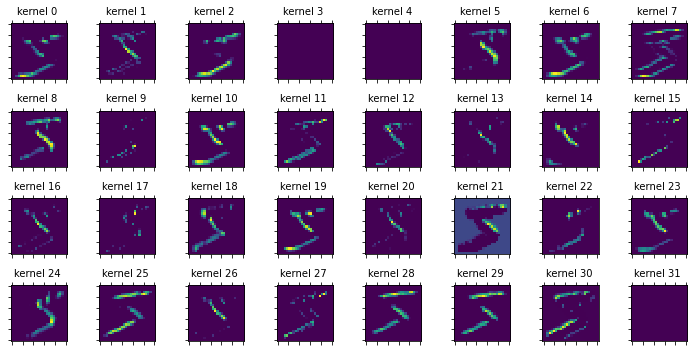

In [23]:
#Convolution 시각화
#각 커널은 입력 이미지로부터 서로 다른 피처를 추출하는 역할을 한다
fig,axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32) :
  axes[i//8, i%8].matshow(conv_activation[0,:,:,i],cmap = 'viridis')
  axes[i//8,i%8].set_title('kernel %s '%str(i), fontsize = 10)
  plt.setp(axes[i//8, i%8].get_xticklabels(),visible = False)
  plt.setp(axes[i//8, i%8].get_yticklabels(),visible = False)

plt.tight_layout()
plt.show()

In [24]:
#최대 풀링 레이어
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


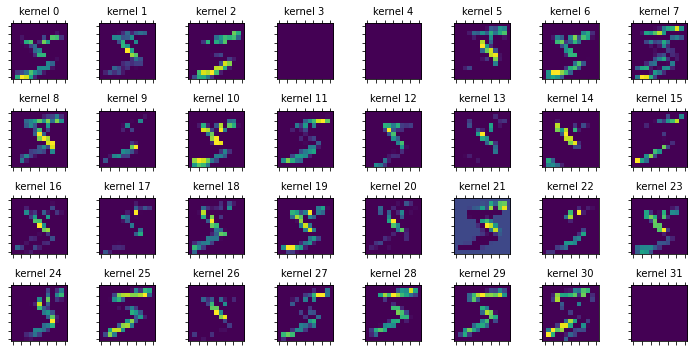

In [25]:
#각 커널별로 출력되는 특성맵 이미지 시각화
fig,axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32) :
  axes[i//8,i%8].matshow(pooling_activation[0,:,:,i],cmap = 'viridis')
  axes[i//8,i%8].set_title('kernel %s'%str(i), fontsize = 10)
  plt.setp(axes[i//8, i%8].get_xticklabels(),visible = False)
  plt.setp(axes[i//8, i%8].get_yticklabels(),visible = False)

plt.tight_layout()
plt.show()

---
## **| 03** 복잡한 모델 생성

### 3-1 데이터셋 준비

In [26]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_valid,y_valid) = mnist.load_data()

print(x_train.shape,y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


* 홀수인지 짝수인지 판단하는 정답 새로 추가 : `y_odd`
  * y_train 이 홀수면 1 / 짝수면 0

In [27]:
y_train_odd = []
for y in y_train :
  if y%2 == 0 :
    y_train_odd.append(0)
  else :
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [28]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [29]:
#검증 데이터셋에도 추가
y_valid_odd =[]
for y in y_valid:
  if y % 2 == 0:
    y_valid_odd.append(0)
  else :
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [30]:
#Normalization

x_train = x_train / 255.0
x_valid = x_valid/255.0

#채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 3-2 Functiona API 로 다중 입력, 다중 출력 레이어 생성

In [31]:
inputs = tf.keras.layers.Input(shape = (28,28,1))

conv = tf.keras.layers.Conv2D(32,(3,3),activation = 'relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat,flat_inputs])
outputs = tf.keras.layers.Dense(10, activation = 'softmax')(concat)

model = tf.keras.models.Model(inputs = inputs, outputs = outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

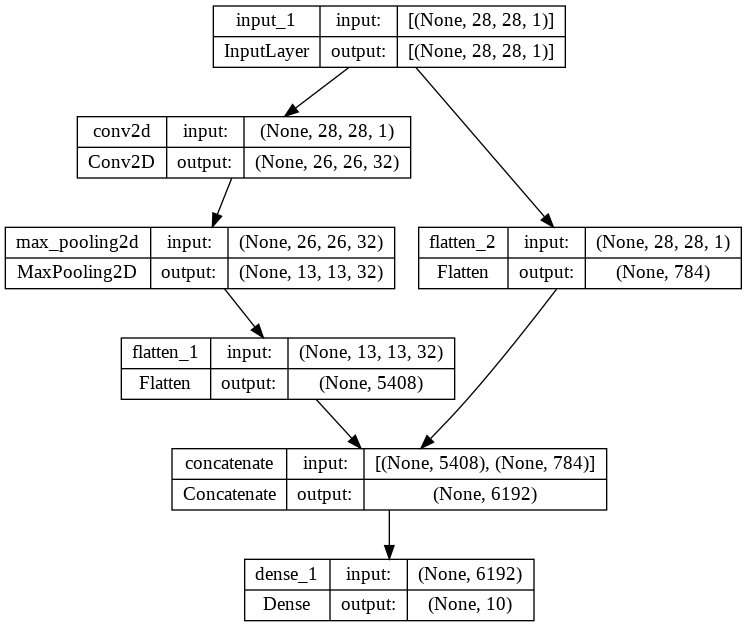

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True, show_layer_names = True, to_file = 'functional_cnn.png')

In [33]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train_in, y_train, validation_data = (x_valid_in,y_valid),
                    epochs = 10)

val_loss, val_acc = model.evaluate(x_valid_in,y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1948 - accuracy: 0.9456 - val_loss: 0.0816 - val_accuracy: 0.9753
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0725 - accuracy: 0.9785 - val_loss: 0.0603 - val_accuracy: 0.9809
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0546 - accuracy: 0.9834 - val_loss: 0.0641 - val_accuracy: 0.9796
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0450 - accuracy: 0.9859 - val_loss: 0.0592 - val_accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0392 - accuracy: 0.9880 - val_loss: 0.0566 - val_accuracy: 0.9827
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0322 - accuracy: 0.9900 - val_loss: 0.0540 - val_accuracy: 0.9827
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0269 - accuracy: 0.9918 - val_loss: 0.0561 -

### 3-3 다중 출력 분류 모델

* 입력 이미지를 하나 받아서 해당 손글씨가 **어떤 숫자** 인지 분류하고 **홀수인지 여부**도 **함께 분류**하는 모델

In [34]:
inputs = tf.keras.layers.Input(shape = (28,28,1),name = 'inputs')

conv = tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', name = 'conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2),name = 'maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name = 'flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat,flat_inputs])
digit_outputs = tf.keras.layers.Dense(10,activation = 'softmax', name = 'digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs = inputs, outputs = [digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

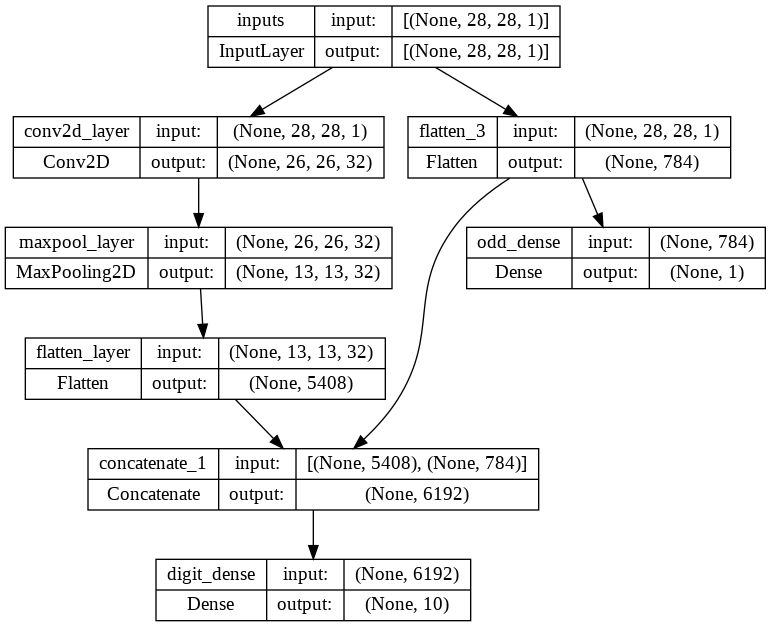

In [35]:
#모델 구조 시각화

plot_model(model,show_shapes = True, show_layer_names = True)

In [36]:
#모델 컴파일
model.compile(optimizer='adam', 
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'}, 
              loss_weights={'digit_dense': 1, 'odd_dense': 0.5}, # loss = 1.0 *sparse_categorical_crossentropy + 0.5*binary_crossentropy
              metrics=['accuracy'])

#모델 훈련
history = model.fit({'inputs': x_train_in}, {'digit_dense': y_train, 'odd_dense': y_train_odd}, 
                    validation_data=({'inputs': x_valid_in},  {'digit_dense': y_valid, 'odd_dense': y_valid_odd}), 
                    epochs=10)


Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 0.3640 - digit_dense_loss: 0.2025 - odd_dense_loss: 0.3230 - digit_dense_accuracy: 0.9427 - odd_dense_accuracy: 0.8656 - val_loss: 0.2183 - val_digit_dense_loss: 0.0803 - val_odd_dense_loss: 0.2761 - val_digit_dense_accuracy: 0.9760 - val_odd_dense_accuracy: 0.8871
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2121 - digit_dense_loss: 0.0764 - odd_dense_loss: 0.2714 - digit_dense_accuracy: 0.9778 - odd_dense_accuracy: 0.8909 - val_loss: 0.1955 - val_digit_dense_loss: 0.0633 - val_odd_dense_loss: 0.2643 - val_digit_dense_accuracy: 0.9786 - val_odd_dense_accuracy: 0.8969
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1893 - digit_dense_loss: 0.0578 - odd_dense_loss: 0.2630 - digit_dense_accuracy: 0.9826 - odd_dense_accuracy: 0.8951 - val_loss: 0.1947 - val_digit_dense_loss: 0.0650 - val_odd_dense_loss: 0.2595 - val_digit_dense_accuracy: 0.9796 -

In [37]:
model.evaluate({'inputs' : x_valid_in}, {'digit_dense' : y_valid, 'odd_dense' : y_valid_odd})

313/313 [==============================] - 3s 11ms/step - loss: 0.1908 - digit_dense_loss: 0.0629 - odd_dense_loss: 0.2558 - digit_dense_accuracy: 0.9827 - odd_dense_accuracy: 0.9026


[0.190760999917984,
 0.06285610049962997,
 0.2558097839355469,
 0.982699990272522,
 0.9025999903678894]

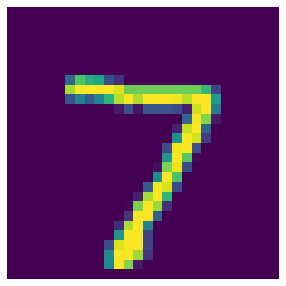

In [38]:
#샘플 이미지 출력

def plot_image(data,idx) :
  plt.figure(figsize = (5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid,0)

In [39]:
#숫자 7 이미지에 대한 예측 확률
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 3s 9ms/step
[2.6344471e-12 4.0099202e-11 1.2866214e-08 5.4826551e-06 1.8253314e-10
 2.2634850e-12 5.5845988e-19 9.9999434e-01 6.2611218e-09 1.6132840e-07]
[0.9995407]


In [40]:
digit_labels = np.argmax(digit_preds, axis = -1)
digit_labels[0:10]

#첫번째 이미지를 7로 예측

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [41]:
#홀수,짝수 여부에 대한 예측 레이블 출력

odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1,-1)[0]
odd_labels[0:10]

<ipython-input-41-fc539d1167f5>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1,-1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

### 3-4 전이학습

: 기존에 학습된 모델을 활용해 새로운 모델을 만들어 내는 개념

In [43]:
base_model_output = model.get_layer('flatten_layer').output

base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


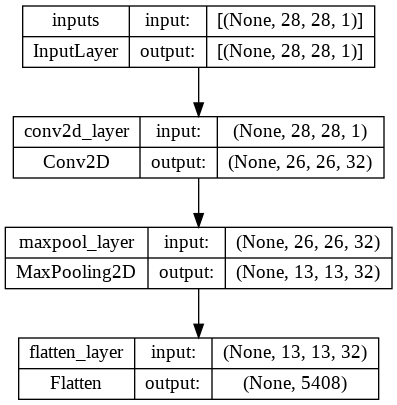

In [44]:
#모델 구조 시각화

plot_model(base_model,show_shapes = True, show_layer_names = True)

In [45]:
#base_model을 레이어로 추가하고, 최종 분류기 역할 Dense 레이어 새롭게 추가

digit_model = tf.keras.Sequential([
  base_model, tf.keras.layers.Dense(10,activation = 'softmax')
])

digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


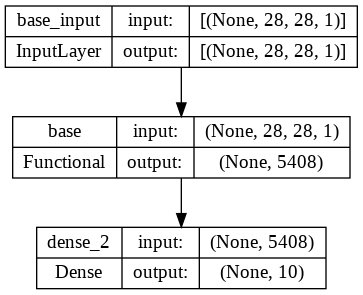

In [46]:
#최종적으로 노드 10개를 가진 Dense레이어 추가된 것 확인
plot_model(digit_model,show_shapes = True, show_layer_names = True)

In [48]:
#모델 컴파일
digit_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

#모델 훈련
history = digit_model.fit(x_train_in, y_train, validation_data = (x_valid_in,y_valid), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0685 - accuracy: 0.9793 - val_loss: 0.0580 - val_accuracy: 0.9820
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0476 - accuracy: 0.9858 - val_loss: 0.0577 - val_accuracy: 0.9817
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0371 - accuracy: 0.9884 - val_loss: 0.0529 - val_accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0560 - val_accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0245 - accuracy: 0.9926 - val_loss: 0.0531 - val_accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0208 - accuracy: 0.9937 - val_loss: 0.0586 - val_accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0177 - accuracy: 0.9944 - val_loss: 0.0530 -

In [49]:
#베이스 모델의 가중치 고정

base_model_frozen = tf.keras.models.Model(inputs = model.input, outputs = base_model_output,
                                          name = 'base_frozen')

base_model_frozen.trainable =False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [52]:

#Functional API 적용

dense_output = tf.keras.layers.Dense(10, activation = 'softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs = base_model_frozen.input, outputs = dense_output)

digit_model_frozen.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [53]:
#모델 컴파일 및 훈련
digit_model_frozen.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = digit_model_frozen.fit(x_train_in,y_train, validation_data = (x_valid_in,y_valid), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1176 - accuracy: 0.9685 - val_loss: 0.0554 - val_accuracy: 0.9818
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0485 - accuracy: 0.9857 - val_loss: 0.0570 - val_accuracy: 0.9814
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0349 - accuracy: 0.9895 - val_loss: 0.0497 - val_accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0280 - accuracy: 0.9917 - val_loss: 0.0500 - val_accuracy: 0.9836
Epoch 5/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0218 - accuracy: 0.9934 - val_loss: 0.0518 - val_accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0181 - accuracy: 0.9946 - val_loss: 0.0520 - val_accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0145 - accuracy: 0.9958 - val_loss: 0.0525 -

In [54]:
#특정 레이어만 지정하여 파라미터가 업데이트 되지 않도록 고정

base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()
     

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [55]:

#고정한 모델에 새로운 분류기 역할을 하는 Dense 레이어 연결

dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [56]:
#모델 컴파일 및 훈련
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = digit_model_frozen2.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1166 - accuracy: 0.9691 - val_loss: 0.0579 - val_accuracy: 0.9825
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0478 - accuracy: 0.9859 - val_loss: 0.0508 - val_accuracy: 0.9839
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0350 - accuracy: 0.9895 - val_loss: 0.0520 - val_accuracy: 0.9830
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0271 - accuracy: 0.9919 - val_loss: 0.0500 - val_accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0225 - accuracy: 0.9929 - val_loss: 0.0527 - val_accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0167 - accuracy: 0.9951 - val_loss: 0.0538 - val_accuracy: 0.9838
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0147 - accuracy: 0.9956 - val_loss: 0.0554 -